<a href="https://colab.research.google.com/github/Minh-A/Dacon_ArcticSeaIce_Prediction/blob/main/Dacon_Code_12_Submit%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(/^▽^)/   코드공유입니다!

# 라이브러리

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.neighbors import KNeighborsRegressor  # 사용할 모델입니다.

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1차 데이터 불러오기
# fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')

# 2차 데이터 불러오기
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_v2.csv')
fn.tail()

,month,file_nm
489,2019-08,201908.npy
490,2019-09,201909.npy
491,2019-10,201910.npy
492,2019-11,201911.npy
493,2019-12,201912.npy


In [ ]:
# 데이터 불러오기
# 2000년도 데이터부터 불러옵니다.
dm = fn.iloc[255:,1]
dm.shape

(239,)

In [ ]:
# 데이터 생성
# 2000년도 이후 데이터들을 불러와 하나의 데이터 셋으로 만듭니다.
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/200001.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape

100%|██████████| 239/239 [00:05<00:00, 44.61it/s]


(240, 448, 304)

In [ ]:
# 월별 데이터 셋 만들기
# 월별로 데이터를 뽑아 합치는 For문입니다.

# 데이터 셋 형태 변환
data = data.reshape(240,1, 448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i], data[60+i], data[72+i], data[84+i], data[96+i], data[108+i], data[120+i],
                                                            data[132+i], data[144+i], data[156+i], data[168+i], data[180+i], data[192+i], data[204+i], data[216+i], data[228+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 291.43it/s]


 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)


## 함수

In [ ]:
# 그림을 그리는 함수
# 코드공유 - 'DATA loading + Simple EDA + 참고가능 논문' 내의 함수를 약간 변경하였습니다.
# 코드 공유를 해주신 Jay윤님 감사합니다.

def show(npy):
    num_channel = npy.shape[0]
    plt.figure(figsize=(50, 50)) 
    for channel in range(num_channel):
      tmpimg = npy[channel, :, :]
      ax = plt.subplot(1, num_channel, channel+1)  # (행, 열, 데이터 개수) - 그리고 싶은 팜플렛 모양
      ax.title.set_text("Ice")

      ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
# 소숫점 둘째 자리에서 반올림하는 함수

def fun1(x) : 
  return np.around(x,2)

In [ ]:
# 점수 계산
# 대회안내 - 규칙에 존재하는 산식 코드입니다.

def mae_score(true, pred):
    score = np.mean(np.abs(true-pred))
    
    return score

def f1_score(true, pred):
    target = np.where((true>250*0.05)&(true<250*0.5))
    
    true = true[target]
    pred = pred[target]
    true = np.where(true < 250*0.15, 0, 1)
    pred = np.where(pred < 250*0.15, 0, 1)
    
    right = np.sum(true * pred == 1)
    precision = right / np.sum(true+1e-8)
    recall = right / np.sum(pred+1e-8)
    score = 2 * precision*recall/(precision+recall+1e-8)
    
    return score
    
def mae_over_f1(true, pred):
    mae = mae_score(true, pred)
    f1 = f1_score(true, pred)
    score = mae/(f1+1e-8)
    
    return score

# 테스팅
> 예측에는 아무 필요없는 섹션이기에, 실제 코딩시(Private Score 복원) 넘기셔도 무방합니다.

> 테스팅을 통해 얻고자 하는 것
* 1. 훈련을 시킬 데이터의 양 (몇 개의 데이터를 훈련시킬 것인가?)
* 2. KNeighborsRegressor에 들어갈 파라미터 값인 n_neighbors를 몇으로 할 것인가?

> 코드 설명 
* 코드 중 real이 train*[18]은 2019 예측을 의미합니다.
* 코드 중 real이 train*[19]는 2020 예측를 의미합니다.

1. 훈련시킬 데이터의 양

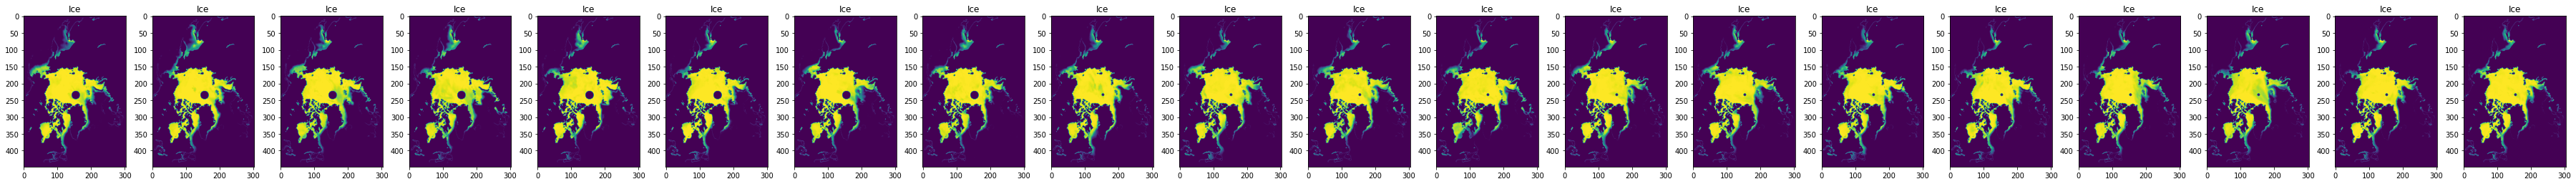

In [ ]:
# 이미지 EDA (날짜는 오름차순입니다. '2000->2001->2002...')
# 가운데에 빈 공간이 작은 12개까지를 기준 훈련데이터 양으로 잡았습니다.
# 12개가 기준인 이유는 크게 없습니다. 
# 그저 EDA를 통해서 가운데 빈공간이 작은 것들이 예측에 도움이 될 것이라 생각했습니다.
# 실제로 빈공간이 있는 데이터들까지 훈련하면 예측된 값들도 가운데 빈공간이 큽니다.(예측값의 손실이 발생)

show(train0)

2. n_neighbors의 값

* 사실 n_neighbors의 값은 데이터 사이언티스트의 직감에 맞겨야합니다.
* 최적의 값을 찾으려고 여러가지 노력을 하였지만..... 종속변수를 모르는 상태로 예측을 해야하기 때문에 여러 번의 제출로 그 값을 예상해야합니다.

In [ ]:
# n_neighbors의 값을 찾기 위한 노력 1

# 훈련데이터 12개만
x_train = train10[5:17].reshape( 12,-1).T
y_train = train10[17].reshape(1,-1).T  # 변동없음
x_test = train10[6:18].reshape( 12,-1).T
real = train10[18]  # 변동없음

# K값을 찾아 1
from sklearn.neighbors import KNeighborsRegressor

num = [610, 620]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/2 [00:00<?, ?it/s]

610


 50%|█████     | 1/2 [08:14<08:14, 494.06s/it]

MAE : 2.8961049107142856 
 F1 : 0.6705146510547739 
 Final 4.319226825194959
620


100%|██████████| 2/2 [16:22<00:00, 491.06s/it]

MAE : 2.896624691611842 
 F1 : 0.6706759487799796 
 Final 4.318963060612855


600일때 4.317515622617064

In [ ]:
# n_neighbors의 값을 찾기 위한 노력 2

# 600, 650, 700을 찾아서

for j in tqdm(range(12)):
  print(j)
  dataset = globals()['train{}'.format(j)]

  # 훈련데이터 12개만
  x_train = dataset[6:18].reshape( 12,-1).T
  y_train = dataset[18].reshape(1,-1).T  # 변동없음
  x_test = dataset[7:19].reshape( 12,-1).T
  real = dataset[19]  # 변동없음

  # K값을 찾아 2
  from sklearn.neighbors import KNeighborsRegressor

  num = [500, 550, 600, 601, 650, 700, 750, 800, 850, 900, 950]

  for i in num:
    print(i)
    model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
           '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/12 [00:00<?, ?it/s]

0
500
MAE : 1.879193711818609 
 F1 : 0.8510191017234283 
 Final 2.2081686367924083
550
MAE : 1.8646010044642858 
 F1 : 0.8533053315587829 
 Final 2.1851509813100547
600
MAE : 1.8508407248590226 
 F1 : 0.8547474124343063 
 Final 2.1653656697645944
601
MAE : 1.8504875469924813 
 F1 : 0.8549874066845191 
 Final 2.1643447738310875
650
MAE : 1.838792733787594 
 F1 : 0.854140375125327 
 Final 2.1527991953193855
700
MAE : 1.8272760514567667 
 F1 : 0.8544956632693841 
 Final 2.1384263356951
750
MAE : 1.8174374412593983 
 F1 : 0.8526738332527227 
 Final 2.1314567763992387
800
MAE : 1.8085444078947366 
 F1 : 0.8508474375705153 
 Final 2.1255801061151454
850
MAE : 1.8006691288768792 
 F1 : 0.8501165794807638 
 Final 2.1181437359982542
900
MAE : 1.7933976298167293 
 F1 : 0.8482142656553895 
 Final 2.1143214412785323
950


  8%|▊         | 1/12 [1:05:22<11:59:05, 3922.32s/it]

MAE : 1.786857377819549 
 F1 : 0.8481362951438401 
 Final 2.1068044923704874
1
500
MAE : 2.9068139832001885 
 F1 : 0.7494524560476388 
 Final 3.87858351915199
550
MAE : 2.898486768679511 
 F1 : 0.7474747287135975 
 Final 3.8777053170623534
600
MAE : 2.8918575246710523 
 F1 : 0.7445963641246098 
 Final 3.883792112298271
601
MAE : 2.8917368861607144 
 F1 : 0.7445963641246098 
 Final 3.883630093633488
650
MAE : 2.88666368068609 
 F1 : 0.7431476381812262 
 Final 3.8843743739899983
700
MAE : 2.8830461407424814 
 F1 : 0.7420854361898911 
 Final 3.8850595380154416
750
MAE : 2.8800980968045113 
 F1 : 0.7390628282527095 
 Final 3.896959700495335
800
MAE : 2.8782762570488725 
 F1 : 0.7372408994622339 
 Final 3.9041190201292206
850
MAE : 2.8770624559445483 
 F1 : 0.7362784283809285 
 Final 3.9075739638270406
900
MAE : 2.876420347744361 
 F1 : 0.7338258151591268 
 Final 3.9197589525015992
950


 17%|█▋        | 2/12 [2:10:17<10:52:20, 3914.05s/it]

MAE : 2.875877070606203 
 F1 : 0.7312696089267523 
 Final 3.932717832346137
2
500
MAE : 4.186001380404136 
 F1 : 0.754346473626989 
 Final 5.549175970539871
550
MAE : 4.179774656367481 
 F1 : 0.7533319478623943 
 Final 5.548383568151997
600
MAE : 4.174298270089286 
 F1 : 0.7515923381835166 
 Final 5.553939286606529
601
MAE : 4.174209351503761 
 F1 : 0.7510791181904586 
 Final 5.557615961929999
650
MAE : 4.169387922932331 
 F1 : 0.7481420128787358 
 Final 5.572989880837284
700
MAE : 4.164271469689849 
 F1 : 0.7463737900232622 
 Final 5.579337685165344
750
MAE : 4.160175560972745 
 F1 : 0.7434511249500125 
 Final 5.595761934309863
800
MAE : 4.155705327772556 
 F1 : 0.738821544414613 
 Final 5.624775431822947
850
MAE : 4.151248384633459 
 F1 : 0.737018406991323 
 Final 5.632489350238763
900
MAE : 4.147874104205827 
 F1 : 0.7350714701619108 
 Final 5.642817353343914
950


 25%|██▌       | 3/12 [3:15:16<9:46:25, 3909.54s/it] 

MAE : 4.144565906954887 
 F1 : 0.7314502345037391 
 Final 5.666230803937752
3
500
MAE : 2.8488362018327074 
 F1 : 0.7602338987219138 
 Final 3.747315358008825
550
MAE : 2.8562502202772557 
 F1 : 0.7605236462649564 
 Final 3.755636260290338
600
MAE : 2.8642340225563916 
 F1 : 0.7608695458249622 
 Final 3.764421904686258
601
MAE : 2.864374779722745 
 F1 : 0.7608695458249622 
 Final 3.764606899821463
650
MAE : 2.871776095512218 
 F1 : 0.7599677615289743 
 Final 3.7788130011546537
700
MAE : 2.880160288416353 
 F1 : 0.758162012080222 
 Final 3.7988717510722263
750


In [ ]:
# n_neighbors의 값을 찾기 위한 노력 3

# 훈련데이터 12개만
x_train = train1[6:18].reshape( 12,-1).T
y_train = train1[18].reshape(1,-1).T  # 변동없음
x_test = train1[7:19].reshape( 12,-1).T
real = train1[19]  # 변동없음

# K값을 찾아 3
from sklearn.neighbors import KNeighborsRegressor

num = [580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/14 [00:00<?, ?it/s]

580


  7%|▋         | 1/14 [05:38<1:13:16, 338.21s/it]

MAE : 2.894177411301692 
 F1 : 0.7463672203295241 
 Final 3.8776855329298163
581


 14%|█▍        | 2/14 [11:18<1:07:44, 338.72s/it]

MAE : 2.8941291705827066 
 F1 : 0.7462029308262862 
 Final 3.878474624313295
582


 21%|██▏       | 3/14 [16:55<1:02:00, 338.26s/it]

MAE : 2.893910655545113 
 F1 : 0.7456507189614915 
 Final 3.8810538810518165
583


 29%|██▊       | 4/14 [22:32<56:18, 337.84s/it]  

MAE : 2.8937045494595877 
 F1 : 0.7459268856833926 
 Final 3.879340678295927
584


 36%|███▌      | 5/14 [28:13<50:49, 338.87s/it]

MAE : 2.8937685032894738 
 F1 : 0.7456507189614915 
 Final 3.8808632391733635
585


 43%|████▎     | 6/14 [33:54<45:16, 339.61s/it]

MAE : 2.8936091694078954 
 F1 : 0.7457626931061149 
 Final 3.88006688636474
586


 50%|█████     | 7/14 [39:34<39:36, 339.52s/it]

MAE : 2.893527519971805 
 F1 : 0.7456507189614915 
 Final 3.8805400539228048
587


 57%|█████▋    | 8/14 [45:14<33:58, 339.81s/it]

MAE : 2.893447999882518 
 F1 : 0.7456507189614915 
 Final 3.8804334086984413
588


 64%|██████▍   | 9/14 [50:56<28:21, 340.34s/it]

MAE : 2.893359815554511 
 F1 : 0.7456507189614915 
 Final 3.88031514377281
589


 71%|███████▏  | 10/14 [56:34<22:39, 339.77s/it]

MAE : 2.893104807918233 
 F1 : 0.7453744305802446 
 Final 3.8814113422859857
590


 79%|███████▊  | 11/14 [1:02:11<16:56, 338.80s/it]

MAE : 2.892948411066729 
 F1 : 0.7456507189614915 
 Final 3.879763404906606
591


 86%|████████▌ | 12/14 [1:07:47<11:16, 338.01s/it]

MAE : 2.8928487723214285 
 F1 : 0.7460911505762727 
 Final 3.8773395600706797
592


 93%|█████████▎| 13/14 [1:13:23<05:37, 337.49s/it]

MAE : 2.892685840578008 
 F1 : 0.7450980204592422 
 Final 3.882288936926993
593


100%|██████████| 14/14 [1:19:02<00:00, 338.73s/it]

MAE : 2.892666529605263 
 F1 : 0.7453744305802446 
 Final 3.880823344778815


In [ ]:
# n_neighbors의 값을 찾기 위한 노력 4

# 훈련데이터 12개만
x_train = train1[6:18].reshape( 12,-1).T
y_train = train1[18].reshape(1,-1).T  # 변동없음
x_test = train1[7:19].reshape( 12,-1).T
real = train1[19]  # 변동없음

# K값을 찾아 4
from sklearn.neighbors import KNeighborsRegressor

num = [594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/12 [00:00<?, ?it/s]

594


  8%|▊         | 1/12 [05:39<1:02:19, 339.97s/it]

MAE : 2.8925676985432327 
 F1 : 0.744708975951903 
 Final 3.8841584472703663
595


 17%|█▋        | 2/12 [11:20<56:40, 340.02s/it]  

MAE : 2.8924406719924813 
 F1 : 0.7443194164948677 
 Final 3.886020664022566
596


 25%|██▌       | 3/12 [16:57<50:53, 339.32s/it]

MAE : 2.8922762717340227 
 F1 : 0.744708975951903 
 Final 3.8837671174828823
597


 33%|███▎      | 4/12 [22:37<45:14, 339.37s/it]

MAE : 2.89210350093985 
 F1 : 0.744432175291746 
 Final 3.884979126482049
598


 42%|████▏     | 5/12 [28:15<39:33, 339.14s/it]

MAE : 2.8919907924107138 
 F1 : 0.7448731896164806 
 Final 3.8825276488665965
599


 50%|█████     | 6/12 [33:56<33:57, 339.57s/it]

MAE : 2.8919396146616534 
 F1 : 0.7448731896164806 
 Final 3.8824589422074136
600


 58%|█████▊    | 7/12 [39:40<28:24, 340.86s/it]

MAE : 2.8918575246710523 
 F1 : 0.7445963641246098 
 Final 3.883792112298271
601


 67%|██████▋   | 8/12 [45:21<22:44, 341.01s/it]

MAE : 2.8917368861607144 
 F1 : 0.7445963641246098 
 Final 3.883630093633488
602


 75%|███████▌  | 9/12 [51:00<17:00, 340.33s/it]

MAE : 2.8915435561560154 
 F1 : 0.7445963641246098 
 Final 3.883370449601611
603


 83%|████████▎ | 10/12 [56:41<11:21, 340.56s/it]

MAE : 2.8914550781250004 
 F1 : 0.7437651544982968 
 Final 3.887591428237187
604


 92%|█████████▏| 11/12 [1:02:20<05:40, 340.16s/it]

MAE : 2.891491203594925 
 F1 : 0.7443194164948677 
 Final 3.8847450444918126
605


100%|██████████| 12/12 [1:08:02<00:00, 340.17s/it]

MAE : 2.8913552925281953 
 F1 : 0.7445963641246098 
 Final 3.8831176097619844


600일때 4.317515622617064 - 2018년

600일때 5.005742495791236 - 2019년 (10)

900일때 4.9909113043175575 단, F1은 0.0805 - 2019년 (10)

900일때 2.1143214412785323 단, F1은 0.08482 - 2019년 (10)

500일때 5.549175970539871 - 2019년 (2)

400일때 3.9107814685121696 - 2019년 (4)

800일때 4.005349103136658 - 2019년 (6)

700일때 2.1384263356951 - 2019년 (0)

In [ ]:
# n_neighbors의 값을 찾기 위한 노력 5

# 월별 최적의 K값 찾기
# 일단은 모두 12개로 한정 
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# 저장
jj = pd.DataFrame(('데이터 셋', '데이터 빼기', 'K값', 'MAE', 'F1', 'Final')).T

for i in tqdm(range(10)):
    i = i+2
    dataset = globals()['train{}'.format(i)]
    print('\n << 데이터셋: %s >>' % i)

    datanum = [9, 10, 13]
    for j in datanum:
        print('! 데이터 뺴기: %s !' % j)
        x_train = dataset[j:17].reshape( (17-j),-1).T
        y_train = dataset[17].reshape(1,-1).T  # 변동없음
        x_test = dataset[(1+j):18].reshape( (17-j),-1).T
        real = dataset[18]  # 변동없음

        num = [500, 800, 1000]
        for k in tqdm(num):
            print('K값: %s' % k)
            model = KNeighborsRegressor(n_neighbors= k, weights='distance', p=1, n_jobs=-1)
            model.fit(x_train, y_train)

            pre = model.predict(x_test)
            pre = pre.reshape(-1)
            
            mae = mae_score(real.reshape(-1), fun1(pre))
            f1 = f1_score(real.reshape(-1), fun1(pre))
            finall = mae_over_f1(real.reshape(-1), fun1(pre))
            
            print( "MAE : %s" % mae,
                   '\n F1 : %s' % f1,
                   '\n Final %s' % finall)
            
            # 저장
            li = []
            li.append(i)
            li.append(j)
            li.append(k)
            li.append(mae)
            li.append(f1)
            li.append(finall)
            
            li1 = pd.DataFrame(li).T
            
            jj = jj.append(li1)
            jj = jj.reset_index(drop=True)

  0%|          | 0/3 [00:00<?, ?it/s]


 << 데이터셋: 2 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:32<11:04, 332.17s/it]

MAE : 3.9389819519501876 
 F1 : 0.703315490912971 
 Final 5.6005902711329565
K값: 800



 67%|██████▋   | 2/3 [11:44<05:44, 344.13s/it]

MAE : 3.93756013569079 
 F1 : 0.6921723662338903 
 Final 5.688698756103289
K값: 1000



100%|██████████| 3/3 [18:17<00:00, 365.79s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.9359186295817667 
 F1 : 0.6871657581077051 
 Final 5.7277571326353645
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:20<10:40, 320.21s/it]

MAE : 4.016891153665414 
 F1 : 0.6929371061639444 
 Final 5.796905750846002
K값: 800



 67%|██████▋   | 2/3 [11:05<05:27, 327.86s/it]

MAE : 4.009656954887219 
 F1 : 0.6854006415228903 
 Final 5.850092126376259
K값: 1000



100%|██████████| 3/3 [17:22<00:00, 347.48s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.006140889332706 
 F1 : 0.6817878413980829 
 Final 5.875934693053949
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:18<08:36, 258.38s/it]

MAE : 4.6006264685150375 
 F1 : 0.6802602868192941 
 Final 6.763038339921165
K값: 800



 67%|██████▋   | 2/3 [09:11<04:28, 268.87s/it]

MAE : 4.598022644501879 
 F1 : 0.6729339578119327 
 Final 6.832799151828378
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.595102208646616 
 F1 : 0.6676922908993987 
 Final 6.882065589878593

 << 데이터셋: 3 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:38<11:17, 338.90s/it]

MAE : 3.863840901080827 
 F1 : 0.6874095322625721 
 Final 5.620871785345312
K값: 800



 67%|██████▋   | 2/3 [11:51<05:49, 349.10s/it]

MAE : 3.822268268327067 
 F1 : 0.6801955798848276 
 Final 5.619366436901278
K값: 1000



100%|██████████| 3/3 [18:32<00:00, 370.79s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.8065781396851497 
 F1 : 0.6732526358572738 
 Final 5.65401140731963
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:21<10:42, 321.23s/it]

MAE : 3.861869346217105 
 F1 : 0.693200644351883 
 Final 5.57106996649882
K값: 800



 67%|██████▋   | 2/3 [11:07<05:28, 328.63s/it]

MAE : 3.825747694431391 
 F1 : 0.6869315271912041 
 Final 5.56932894662909
K값: 1000



100%|██████████| 3/3 [17:22<00:00, 347.64s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.812125675516917 
 F1 : 0.679199788248733 
 Final 5.612671978622791
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:15<08:30, 255.13s/it]

MAE : 4.112434357377819 
 F1 : 0.6762058436673242 
 Final 6.081630815637734
K값: 800



 67%|██████▋   | 2/3 [09:02<04:24, 264.94s/it]

MAE : 4.051854954769737 
 F1 : 0.6720967933832099 
 Final 6.0286776166371485
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.024410097509398 
 F1 : 0.6713417300940232 
 Final 5.994577511217712

 << 데이터셋: 4 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:48<11:36, 348.03s/it]

MAE : 3.5963952361372176 
 F1 : 0.7497440940390485 
 Final 4.796830300848765
K값: 800



 67%|██████▋   | 2/3 [12:04<05:56, 356.43s/it]

MAE : 3.5618042910009398 
 F1 : 0.7479295858934027 
 Final 4.762218677476401
K값: 1000



100%|██████████| 3/3 [18:47<00:00, 375.92s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5473646763392854 
 F1 : 0.7423648970316606 
 Final 4.778464933806463
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:26<10:53, 326.92s/it]

MAE : 3.5639738016917293 
 F1 : 0.7643215874215389 
 Final 4.662924368112714
K값: 800



 67%|██████▋   | 2/3 [11:30<05:37, 337.89s/it]

MAE : 3.528751027960526 
 F1 : 0.7587965116504516 
 Final 4.650457569685705
K값: 1000



100%|██████████| 3/3 [18:05<00:00, 361.87s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.514265301926692 
 F1 : 0.7530800614214961 
 Final 4.666522771334591
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:34<09:08, 274.32s/it]

MAE : 3.5862483846334587 
 F1 : 0.7739845295244508 
 Final 4.633488398666089
K값: 800



 67%|██████▋   | 2/3 [09:38<04:43, 283.30s/it]

MAE : 3.5378494331531956 
 F1 : 0.7792272746347606 
 Final 4.540202201481505
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5139734345629696 
 F1 : 0.7755617059133267 
 Final 4.530875315866771

 << 데이터셋: 5 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:05<12:11, 365.71s/it]

MAE : 4.316062690906955 
 F1 : 0.7913969327335874 
 Final 5.453726768262102
K값: 800



 67%|██████▋   | 2/3 [12:48<06:16, 376.79s/it]

MAE : 4.260973111489661 
 F1 : 0.7808393200690296 
 Final 5.456914050567832
K값: 1000



100%|██████████| 3/3 [19:52<00:00, 397.63s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.238583690671993 
 F1 : 0.7764054328285901 
 Final 5.45924005276166
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:48<11:36, 348.01s/it]

MAE : 4.319542117011279 
 F1 : 0.8012486805350794 
 Final 5.391013012609929
K값: 800



 67%|██████▋   | 2/3 [12:08<05:57, 357.61s/it]

MAE : 4.272029781484963 
 F1 : 0.7918160537998988 
 Final 5.395229999481994
K값: 1000



100%|██████████| 3/3 [18:57<00:00, 379.06s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.2538700511043235 
 F1 : 0.7864118708423063 
 Final 5.409213867099907
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:44<09:29, 284.67s/it]

MAE : 4.599858508576127 
 F1 : 0.7999173879612544 
 Final 5.750416880917659
K값: 800



 67%|██████▋   | 2/3 [09:57<04:53, 293.23s/it]

MAE : 4.532676074953009 
 F1 : 0.7995023657531041 
 Final 5.669371614666412
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.505597024788533 
 F1 : 0.7991666479514691 
 Final 5.637869122740783

 << 데이터셋: 6 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:26<12:52, 386.30s/it]

MAE : 3.395016227091166 
 F1 : 0.6925953457644551 
 Final 4.9018755306897805
K값: 800



 67%|██████▋   | 2/3 [13:32<06:38, 398.39s/it]

MAE : 3.331393987899436 
 F1 : 0.684202552971027 
 Final 4.86901711305122
K값: 1000



100%|██████████| 3/3 [21:05<00:00, 421.93s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.3058377144031943 
 F1 : 0.6776205521025686 
 Final 4.878597107717052
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:02<12:04, 362.43s/it]

MAE : 3.4276403900375936 
 F1 : 0.7087192888935773 
 Final 4.836386416157541
K값: 800



 67%|██████▋   | 2/3 [12:38<06:12, 372.66s/it]

MAE : 3.3561293614896615 
 F1 : 0.6969244380172299 
 Final 4.815628682618246
K값: 1000



100%|██████████| 3/3 [19:43<00:00, 394.51s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.3254798372885332 
 F1 : 0.6911167724077859 
 Final 4.811748060440486
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:00<10:01, 300.61s/it]

MAE : 3.5794379258693607 
 F1 : 0.7467559476782137 
 Final 4.79331686485424
K값: 800



 67%|██████▋   | 2/3 [10:31<05:09, 309.70s/it]

MAE : 3.5323800223214286 
 F1 : 0.7384180619366676 
 Final 4.78371285396221
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5136861930216163 
 F1 : 0.7277149635611126 
 Final 4.828382430867407

 << 데이터셋: 7 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:45<13:30, 405.08s/it]

MAE : 3.1803962787828945 
 F1 : 0.7345260931636814 
 Final 4.329861478148417
K값: 800



 67%|██████▋   | 2/3 [14:08<06:56, 416.65s/it]

MAE : 3.130996607730263 
 F1 : 0.7198624902718057 
 Final 4.349437019636474
K값: 1000



100%|██████████| 3/3 [21:56<00:00, 438.72s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.110869214050752 
 F1 : 0.708364339555202 
 Final 4.39162306234657
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:22<12:45, 382.69s/it]

MAE : 3.1797853031015038 
 F1 : 0.7184513410778588 
 Final 4.42588812496632
K값: 800



 67%|██████▋   | 2/3 [13:19<06:32, 392.86s/it]

MAE : 3.150234154722744 
 F1 : 0.7015445751632108 
 Final 4.490426155865572
K값: 1000



100%|██████████| 3/3 [20:46<00:00, 415.66s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.132823146734023 
 F1 : 0.6914199512518895 
 Final 4.530998990919661
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:14<10:28, 314.12s/it]

MAE : 3.592407483552632 
 F1 : 0.6718226161290805 
 Final 5.347255873550179
K값: 800



 67%|██████▋   | 2/3 [11:01<05:24, 324.22s/it]

MAE : 3.574509589403196 
 F1 : 0.6602597218398962 
 Final 5.413793113571198
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5602359903665413 
 F1 : 0.6599011004843465 
 Final 5.395105317755021

 << 데이터셋: 8 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:54<13:48, 414.00s/it]

MAE : 2.4812607201597743 
 F1 : 0.6959152618086549 
 Final 3.5654638153163107
K값: 800



 67%|██████▋   | 2/3 [14:24<07:04, 424.87s/it]

MAE : 2.4290752026550755 
 F1 : 0.6899938431395659 
 Final 3.520430206156841
K값: 1000



100%|██████████| 3/3 [22:23<00:00, 447.83s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 2.411608391094925 
 F1 : 0.6882916098833721 
 Final 3.503759629535459
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:31<13:03, 391.77s/it]

MAE : 2.5005953359962407 
 F1 : 0.7020826863392894 
 Final 3.561682048332095
K값: 800



 67%|██████▋   | 2/3 [13:38<06:42, 402.16s/it]

MAE : 2.445425061677632 
 F1 : 0.6941643570397731 
 Final 3.5228328877006705
K값: 1000



100%|██████████| 3/3 [21:14<00:00, 424.87s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 2.4284330210291345 
 F1 : 0.6907407225369764 
 Final 3.5156939595988526
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:24<10:48, 324.28s/it]

MAE : 2.6763267299107136 
 F1 : 0.7031345851734014 
 Final 3.806279406933034
K값: 800



 67%|██████▋   | 2/3 [11:20<05:33, 333.75s/it]

MAE : 2.62732891799812 
 F1 : 0.6947040314552929 
 Final 3.7819398783031253
K값: 1000


In [ ]:
# n_neighbors의 값을 찾기 위한 노력 6

##### 600, 601 차이 구하기 #####
from sklearn.neighbors import KNeighborsRegressor

for i in range(12):
  dataset = globals()['train{}'.format(i)]
  print('\n << 데이터셋 : %s >>' % i)

  # 훈련데이터 12개만
  x_train = dataset[5:17].reshape( 12,-1).T
  y_train = dataset[17].reshape(1,-1).T  # 변동없음
  x_test = dataset[6:18].reshape( 12,-1).T
  real = dataset[18]  # 변동없음

  num = [602, 603]
  for j in tqdm(num):
    print('!! K값: %s !!' % j)
    model = KNeighborsRegressor(n_neighbors= j, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
          '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/1 [00:00<?, ?it/s]


 << 데이터셋 : 0 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.945055142739661 
 F1 : 0.7941236293074737 
 Final 3.7085599734922083

 << 데이터셋 : 1 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.708133884515978 
 F1 : 0.7175103921330618 
 Final 5.168055924335306

 << 데이터셋 : 2 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.051990865836467 
 F1 : 0.6739275224246629 
 Final 6.012502340211826

 << 데이터셋 : 3 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.9349540354793224 
 F1 : 0.6986399235325111 
 Final 5.632306208983986

 << 데이터셋 : 4 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.614608714168234 
 F1 : 0.7409113979093296 
 Final 4.878597731903971

 << 데이터셋 : 5 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.247626072015977 
 F1 : 0.7961690423483867 
 Final 5.335080608178808

 << 데이터셋 : 6 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.455910699600564 
 F1 : 0.6994841392709029 
 Final 4.940656201005815

 << 데이터셋 : 7 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.2364753436325193 
 F1 : 0.7275811735183046 
 Final 4.448266965869239

 << 데이터셋 : 8 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.3863516212406015 
 F1 : 0.697135874572757 
 Final 3.4230795947379584

 << 데이터셋 : 9 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.168980703712407 
 F1 : 0.7162576517508872 
 Final 5.820504165388417

 << 데이터셋 : 10 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.895823396381579 
 F1 : 0.6703560921835418 
 Final 4.319828501521882

 << 데이터셋 : 11 >>
!! K값: 604 !!


100%|██████████| 1/1 [07:26<00:00, 446.18s/it]

MAE : 2.179491893796993 
 F1 : 0.8334545241949283 
 Final 2.6150099428066143


In [ ]:
# n_neighbors의 값을 찾기 위한 노력 7

# 월별 최적의 K값 찾기
# 일단은 모두 12개로 한정 
from sklearn.neighbors import KNeighborsRegressor

# 일단은 6개만 찾자
for i in tqdm(range(6)):
  dataset = globals()['train{}'.format(i)]
  print('\n << 데이터셋 : %s >>' % i)

  # 훈련데이터 12개만
  x_train = dataset[5:17].reshape( 12,-1).T
  y_train = dataset[17].reshape(1,-1).T  # 변동없음
  x_test = dataset[6:18].reshape( 12,-1).T
  real = dataset[18]  # 변동없음

  num = [200, 300, 400, 500, 600, 700]
  for j in tqdm(num):
    print('K값: %s' % j)
    model = KNeighborsRegressor(n_neighbors= j, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
          '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/6 [00:00<?, ?it/s]


 << 데이터셋 : 0 >>
K값: 200



 17%|█▋        | 1/6 [06:47<33:54, 407.00s/it]

MAE : 3.0469034891917297 
 F1 : 0.8043130802414987 
 Final 3.7882057698164315
K값: 300



 33%|███▎      | 2/6 [13:41<27:17, 409.26s/it]

MAE : 2.9941048666588346 
 F1 : 0.7997589689449932 
 Final 3.7437589892501433
K값: 400



 50%|█████     | 3/6 [20:45<20:40, 413.57s/it]

MAE : 2.9638983200187967 
 F1 : 0.7954774695878553 
 Final 3.725936178047959
K값: 500



 67%|██████▋   | 4/6 [27:58<13:59, 419.50s/it]

MAE : 2.956448543233083 
 F1 : 0.7953714792950415 
 Final 3.7170662803785692
K값: 600



 83%|████████▎ | 5/6 [35:19<07:05, 425.95s/it]

MAE : 2.9454232994595877 
 F1 : 0.7946155225747291 
 Final 3.7067275666205117
K값: 700



  0%|          | 0/6 [00:00<?, ?it/s]

MAE : 2.9341060414708657 
 F1 : 0.7906211245842669 
 Final 3.7111404098926717

 << 데이터셋 : 1 >>
K값: 200



 17%|█▋        | 1/6 [06:40<33:23, 400.76s/it]

MAE : 3.7326413445723685 
 F1 : 0.7556025190919106 
 Final 4.939953481969267
K값: 300



 33%|███▎      | 2/6 [13:34<26:58, 404.64s/it]

MAE : 3.7101306978383457 
 F1 : 0.7474402551598923 
 Final 4.963782218830122
K값: 400



 50%|█████     | 3/6 [20:30<20:24, 408.02s/it]

MAE : 3.704859536536655 
 F1 : 0.7360034275095074 
 Final 5.03375303391677
K값: 500



 67%|██████▋   | 4/6 [27:51<13:56, 418.02s/it]

MAE : 3.7045947632753755 
 F1 : 0.7256906500868712 
 Final 5.104922754320559
K값: 600


최종적으로 예상된 훈련데이터 수는 '12개'이며, n_neighbors의 값은 '601'입니다. ๑•‿•๑

# KNeighborsRegressor 모델

## 2019년 가져오기

In [ ]:
# 배포된 2차 데이터
# 2019년 데이터 가져오기
dm1 = fn.iloc[483:,1]
dm1.shape

(11,)

In [ ]:
# 2019년 데이터 전처리
data1 = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/201901.npy')
data1 = data1.reshape(1,448,304,5)

for i in tqdm(dm1):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/'+i)
    a = a.reshape(1,448,304,5)

    data1 = np.concatenate((data1,a), axis=0)
data1 = np.array(data1)
data1 = data1[:,:,:,0]
sh1 = data1.reshape(12, -1)
sh1 = pd.DataFrame(sh1)

sh1.shape

100%|██████████| 11/11 [00:00<00:00, 214.61it/s]


(12, 136192)

In [ ]:
# 2019년 데이터 확인
sh1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2020년 예측

  0%|          | 0/12 [00:00<?, ?it/s]

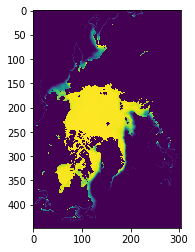

  8%|▊         | 1/12 [07:06<1:18:14, 426.74s/it]

(136192,)


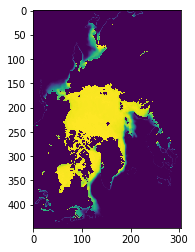

 17%|█▋        | 2/12 [13:57<1:10:18, 421.81s/it]

(136192,)


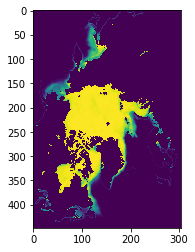

 25%|██▌       | 3/12 [20:45<1:02:38, 417.66s/it]

(136192,)


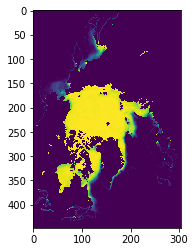

 33%|███▎      | 4/12 [27:39<55:32, 416.59s/it]  

(136192,)


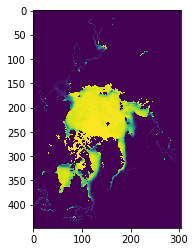

 42%|████▏     | 5/12 [34:48<49:03, 420.53s/it]

(136192,)


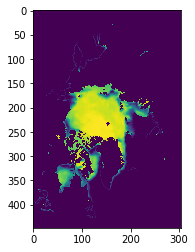

 50%|█████     | 6/12 [42:21<43:00, 430.06s/it]

(136192,)


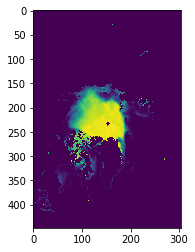

 58%|█████▊    | 7/12 [50:23<37:09, 445.83s/it]

(136192,)


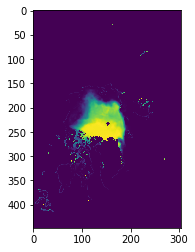

 67%|██████▋   | 8/12 [58:50<30:56, 464.13s/it]

(136192,)


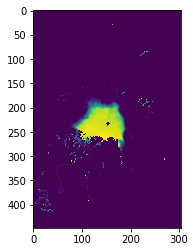

 75%|███████▌  | 9/12 [1:07:23<23:56, 478.77s/it]

(136192,)


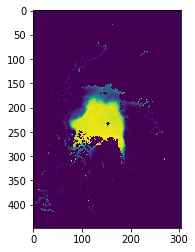

 83%|████████▎ | 10/12 [1:15:21<15:57, 478.60s/it]

(136192,)


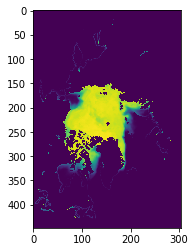

 92%|█████████▏| 11/12 [1:22:52<07:50, 470.28s/it]

(136192,)


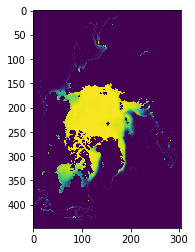

100%|██████████| 12/12 [1:30:01<00:00, 450.10s/it]

(136192,)


In [ ]:
# 기본
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[7:19].reshape(12,-1).T
  y_train = datan[19].reshape(1,-1).T
  x_test = datan[8:20].reshape(12,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) #601
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred_{}'.format(i)] = predictions
  print(globals()['pred_{}'.format(i)].shape)

In [ ]:
# 기본
# 제출 형태로 변환

# 데이터 생성
sh2 = pd.DataFrame(pred_0.reshape(1,-1))  # 초기값 설정
sh2 = fun1(sh2)  # 음수와 소숫점 없애기

for i in range(11):
  globals()['pred_{}'.format(i+1)] = globals()['pred_{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred_{}'.format(i+1)]
  sh = fun1(sh)  # 음수와 소숫점 없애기
  sh = pd.DataFrame(sh)

  sh2 = pd.concat((sh2, sh), axis=0)
  print(sh2.shape)

(2, 136192)
(3, 136192)
(4, 136192)
(5, 136192)
(6, 136192)
(7, 136192)
(8, 136192)
(9, 136192)
(10, 136192)
(11, 136192)
(12, 136192)


In [ ]:
# 1차 데이터 확인 (Pre-제출본)
sh2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 제출

In [ ]:
# 제출 데이터 인덱스 수정

# 2019 데이터와 2020 예측 합치기
result = pd.concat([sh1,sh2], axis=0)
result = result.reset_index(drop=True)

# 제출 파일과 결합
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],result], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Lets Final Check')

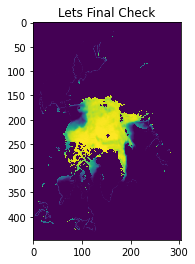

In [ ]:
# 2차 데이터 확인 (최종 제출본)
check = np.array(sub.iloc[10,1:], dtype=np.float64).reshape(448,304)

import matplotlib.pyplot
matplotlib.pyplot.imshow(check, interpolation = 'None')
matplotlib.pyplot.title('Lets Final Check')

In [ ]:
# 제출파일 완성 및 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0413_1_KNN(12, 601).csv', index = False)

수고하셨습니다. ( ⁎ ᵕᴗᵕ ⁎ )

 --------------------

---------------------------

> 부록) 2019 예측
* ᕕ( ՞ ᗜ ՞ )ᕗ 혹시 2019년 예측을 보고 싶은 분들을 위한 2019 예측 코드입니다.
* 모델 부분에 넣으셔서 실행하시면 됩니다.
* 리더보드 'public' 점수 3.857051597이 나오실 것입니다.

In [ ]:
# 기본
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[6:18].reshape(12,-1).T 
  y_train = datan[18].reshape(1,-1).T
  x_test = datan[7:19].reshape(12,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

-------------

* 코드 공유는 여기까지 입니다.
* 대회 초부터 많은 코드를 작성하였지만 가장 결과가 좋은 모델이자 코드들입니다. 
* (나머지 코드들은 제 깃허브에 가시면 난잡하게 업로드 되어 있을 것입니다 (；☉_☉)

> 정말 수고하셨습니다. ( ´╹ᗜ╹`*)
* 궁금한 사항 있으시면 댓글을 통해 답변드리겠습니다.